In [6]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#create a dataframe from list dictionary -init a dataframe by dict without index

d = {"x": [1, 2, 3, 4,5,6,7,8,9,10], "y": [100, 200, 500, 600,900,920,940,980,1100,1500]}
df = pd.DataFrame(d)
print("The DataFrame ")
print(df)



The DataFrame 
    x     y
0   1   100
1   2   200
2   3   500
3   4   600
4   5   900
5   6   920
6   7   940
7   8   980
8   9  1100
9  10  1500


In [8]:
# statistical data of df 
df.describe()

,x,y
count,10.00000,10.000000
mean,5.50000,774.000000
std,3.02765,425.524513
min,1.00000,100.000000
25%,3.25000,525.000000
50%,5.50000,910.000000
75%,7.75000,970.000000
max,10.00000,1500.000000


In [9]:
### Data Processing

#check for null values

df.isnull().sum()



x    0
y    0
dtype: int64

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


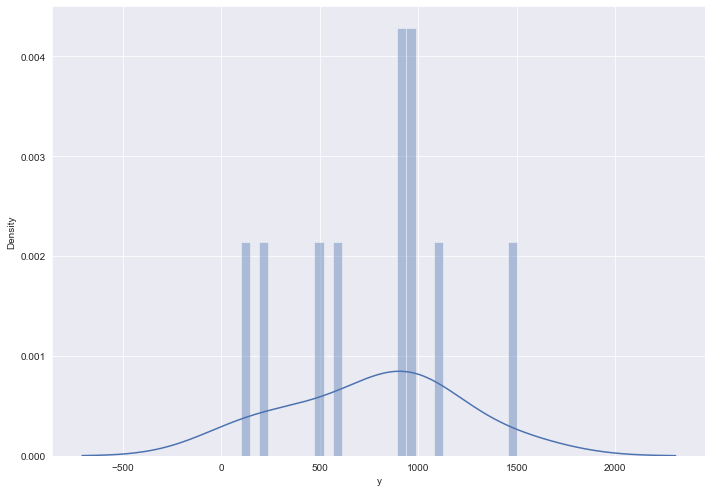

In [58]:
#distribution plot

sns.set({'figure.figsize':(11.7,8.27)})
sns.distplot(df['y'],bins=30)
plt.show()



<AxesSubplot:>

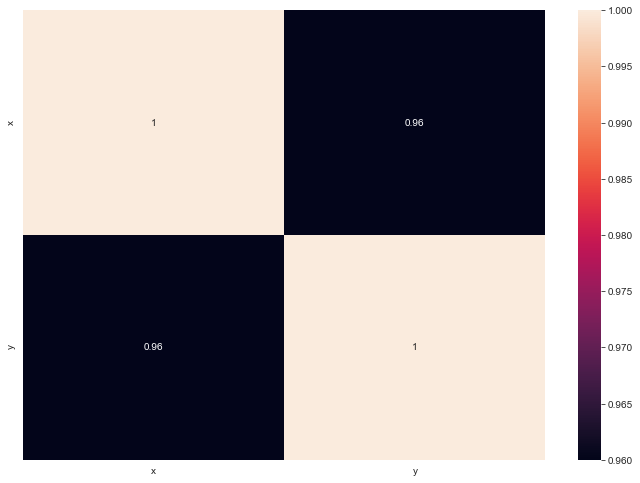

In [27]:
#corelation matrix 
#sns.set({'figure.figsize':(11.7,8.27)})
corr_matrix= df.corr().round(2)
sns.heatmap(data=corr_matrix,annot=True)



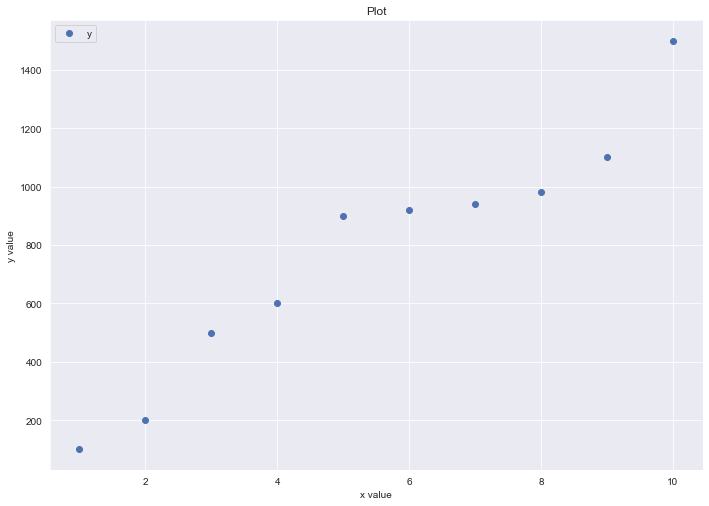

In [26]:
#plot the graph 
#sns.set({'figure.figsize':(11.7,8.27)})
df.plot(x='x', y='y', style='o')
plt.title('Plot')
plt.xlabel('x value')
plt.ylabel('y value')
plt.show()


In [ ]:
#Inference

# Based on the above data evaluation/procession we  can infer the belo and can apply linear regression model to the data set .
#1. The scatter graph plot shows an increase in y with increase in x , so postive linear relation is seen .
#2. The values are highly correlated as the correlation matrix shows 0.96 .
#3. Also the distribution plot shows y values are normally distributed with slight left skewness.
#4. There are no NULL values too in the data(part of data evaluation)

In [12]:
# Import model selection from sklearn library
from sklearn.model_selection import train_test_split

X= df['x']
Y= df['y']

#print(X)
#X = X.reshape(-1, 1)

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(8,)
(2,)
(8,)
(2,)


In [13]:
#import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# convert all 1d array to 2D 
X_train = np.array(X_train).reshape(-1, 1)
Y_train = np.array(Y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
Y_test = np.array(Y_test).reshape(-1, 1)


#define a linear_regression variable 
lin_model= LinearRegression()


#apply the linear_regression model to the trainning set
lin_model.fit(X_train,Y_train)




LinearRegression()

In [20]:
#model evaluation for trainning set
Y_train_predict = lin_model.predict(X_train)
rmse=  np.sqrt(mean_squared_error(Y_train,Y_train_predict))
r2=r2_score(Y_train,Y_train_predict)

print("Model performance for training set \n")
print("RMSE is {}" .format(rmse))
print ("R2 Score {}".format(r2))
print("\n")

Y_train_predict


#model evaluation for testing set
Y_test_predict = lin_model.predict(X_test)
rmse=  np.sqrt(mean_squared_error(Y_test,Y_test_predict))
r2=r2_score(Y_test,Y_test_predict)

print("Model performance for testing set \n")
print("RMSE is {}" .format(rmse))
print ("R2 Score {}".format(r2))
print("\n")



Model performance for training set 

RMSE is 102.94289637985864
R2 Score 0.9140357743656515


Model performance for testing set 

RMSE is 163.93471096206437
R2 Score 0.6804448340283521




In [14]:
print("Linear Model _Score : \n" , lin_model.score(X_train,Y_train))
      
print("Linear Model _Coefficient : \n" , lin_model.coef_)


Linear Model _Score : 
 0.9140357743656515
Linear Model _Coefficient : 
 [[123.73673036]]


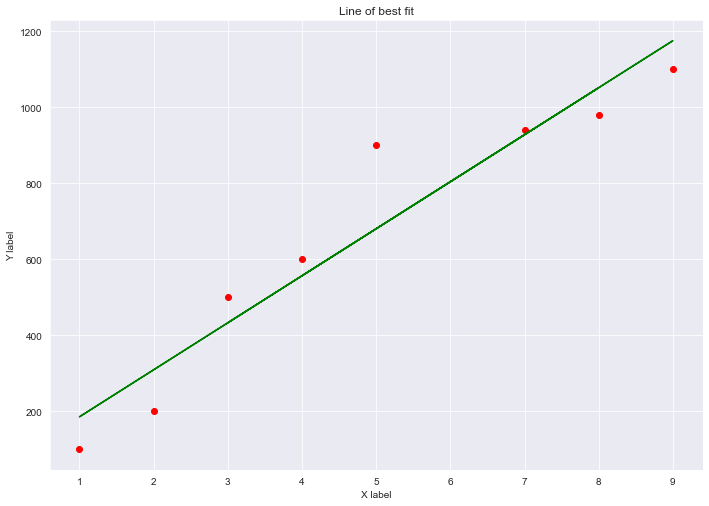

In [29]:
# Plot the line of Best Fit 
#sns.set({'figure.figsize':(11.7,8.27)})
plt.scatter(X_train, Y_train, color = "red")
plt.plot(X_train, Y_train_predict, color = "green")
plt.title("Line of best fit")
plt.xlabel("X label")
plt.ylabel("Y label")
plt.show()